<h1 style="text-align: center; font-size: 2.5em; color: #2E8B57;">Global Plastic Waste 2023 Analysis</h1>
<hr style="border: 1px solid #2E8B57;"/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/global-plastic-waste-2023-a-country-wise-analysis/Plastic Waste Around the World.csv")

In [3]:
df.head()

,Country,Total_Plastic_Waste_MT,Main_Sources,Recycling_Rate,Per_Capita_Waste_KG,Coastal_Waste_Risk
0,China,59.08,Packaging_Industrial,29.8,41.2,High
1,United States,42.02,Packaging_Consumer,32.1,127.5,Medium
2,India,26.33,Consumer_Goods,11.5,19.3,High
3,Japan,7.99,Packaging_Electronics,84.8,63.2,Medium
4,Germany,6.28,Automotive_Packaging,56.1,75.6,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 165 non-null    object 
 1   Total_Plastic_Waste_MT  165 non-null    float64
 2   Main_Sources            165 non-null    object 
 3   Recycling_Rate          165 non-null    float64
 4   Per_Capita_Waste_KG     165 non-null    float64
 5   Coastal_Waste_Risk      165 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.9+ KB


# Top 20 Countries by TPW in Milion Tons

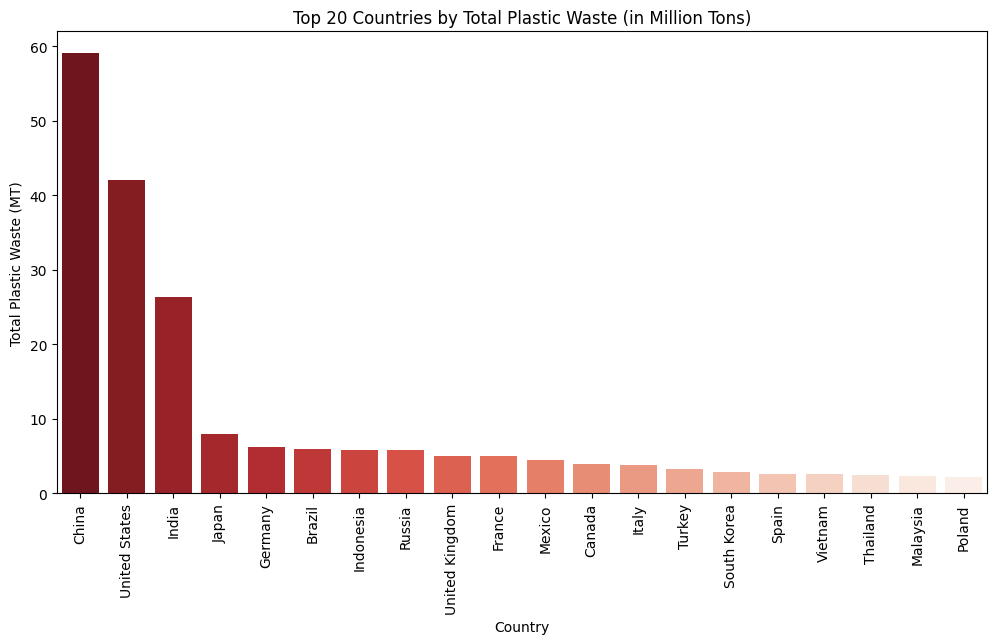

In [5]:
top_20 = df.nlargest(20, 'Total_Plastic_Waste_MT')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Total_Plastic_Waste_MT', palette='Reds_r')

plt.title('Top 20 Countries by Total Plastic Waste (in Million Tons)')
plt.xlabel('Country')
plt.ylabel('Total Plastic Waste (MT)')
plt.xticks(rotation=90)
plt.show()

# Recycling Rate of Countries

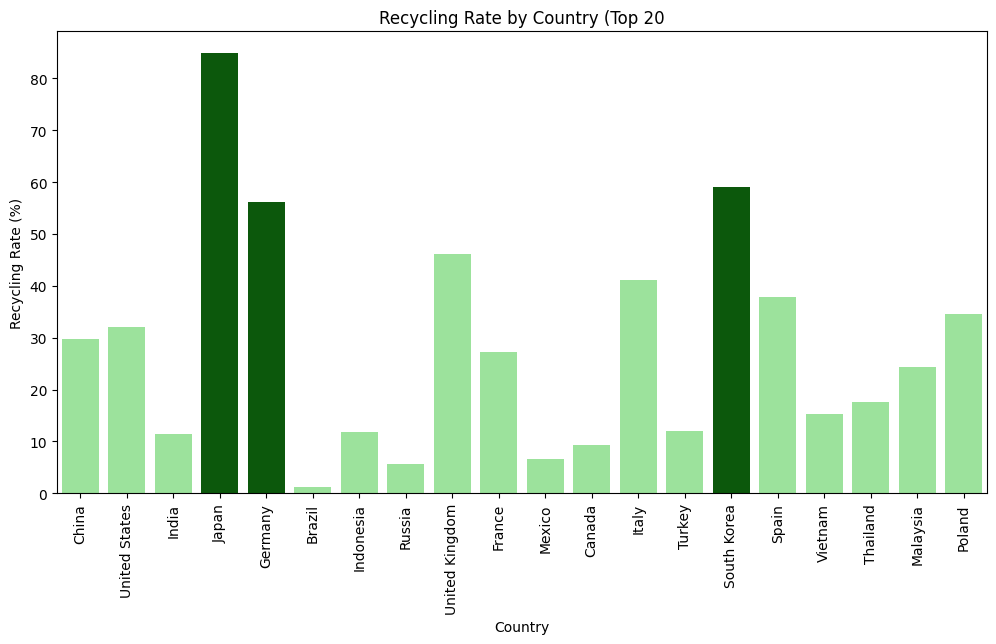

In [6]:
colors = ['lightgreen' if rate <= 50 else 'darkgreen' for rate in top_20['Recycling_Rate']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Recycling_Rate', palette=colors)

plt.title('Recycling Rate by Country (Top 20')
plt.xlabel('Country')
plt.ylabel('Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

# Per Capita Plastic Waste by Countries

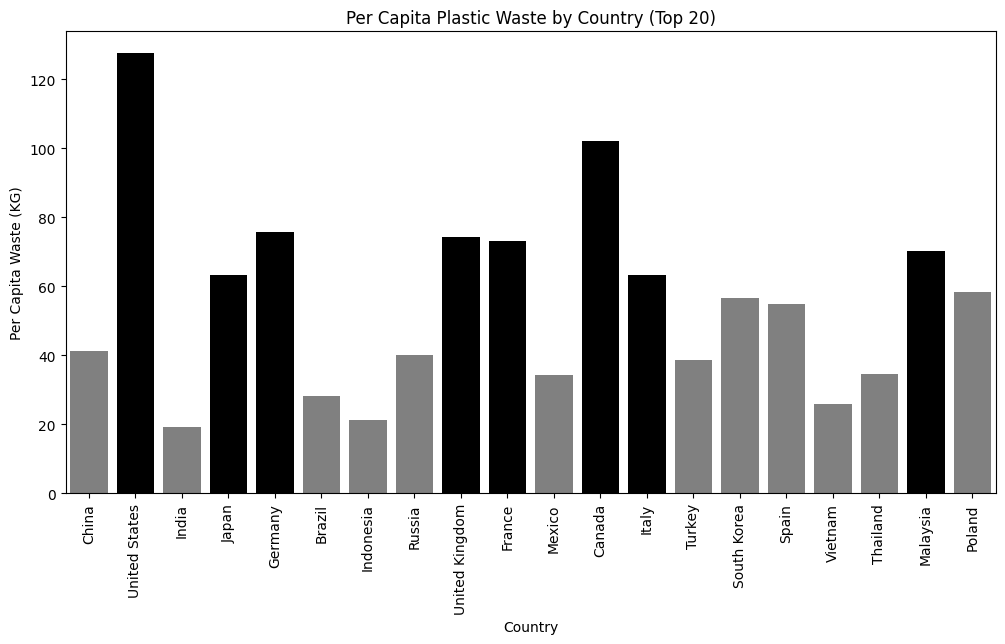

In [7]:
colors = ['grey' if waste < 60 else 'black' for waste in top_20['Per_Capita_Waste_KG']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_20, x='Country', y='Per_Capita_Waste_KG', palette=colors)

plt.title('Per Capita Plastic Waste by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Per Capita Waste (KG)')
plt.xticks(rotation=90)
plt.show()

# Coastal Waste Risk across Countries

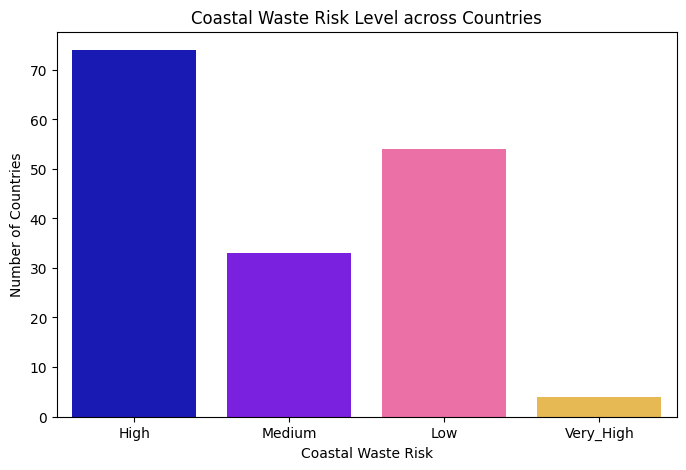

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Coastal_Waste_Risk', palette='gnuplot2')

# Labeling
plt.title('Coastal Waste Risk Level across Countries')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Number of Countries')
plt.show()

# Top 5 countries with High Coastal Risk and Medium Coastal Risk

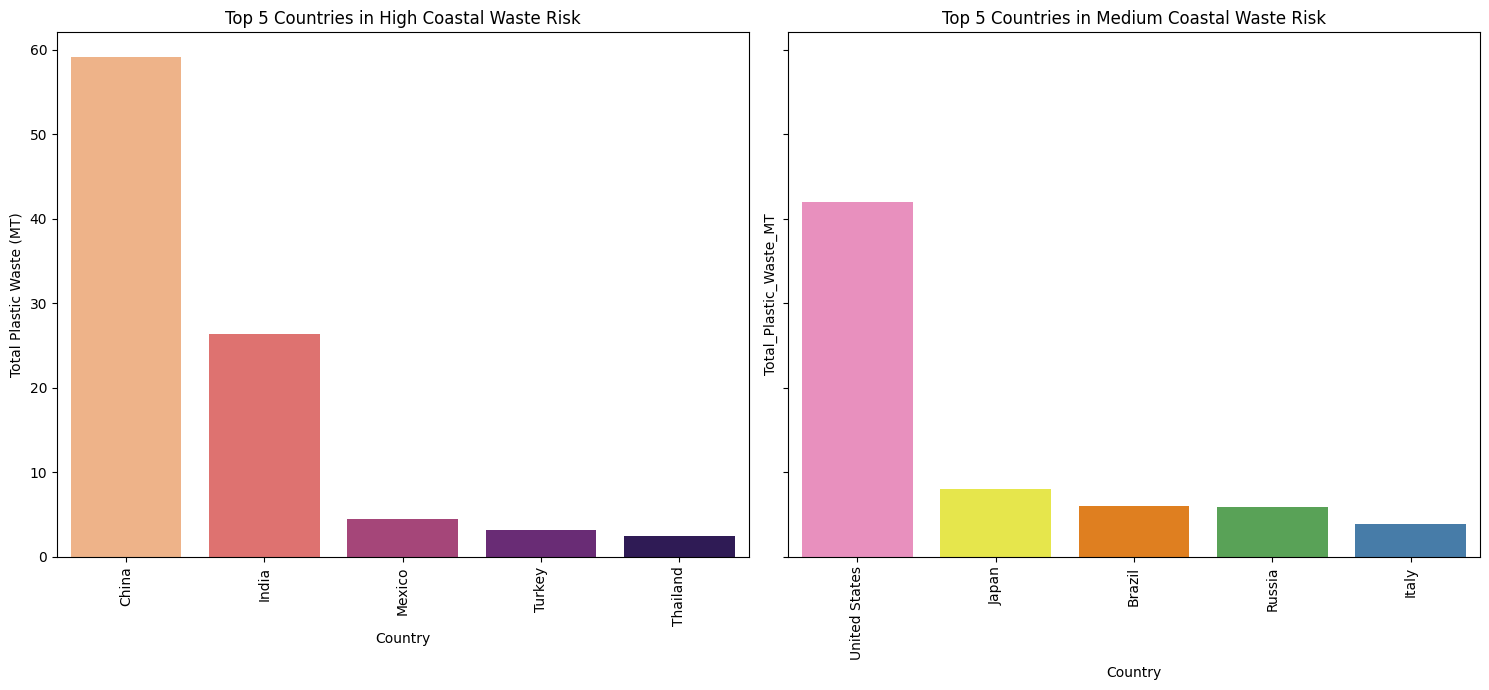

In [9]:
top_5_high_risk = df[df['Coastal_Waste_Risk'] == 'High'].nlargest(5, 'Total_Plastic_Waste_MT')
top_5_medium_risk = df[df['Coastal_Waste_Risk'] == 'Medium'].nlargest(5, 'Total_Plastic_Waste_MT')

fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# High Risk
sns.barplot(data=top_5_high_risk, x='Country', y='Total_Plastic_Waste_MT', palette='magma_r', ax=axes[0])
axes[0].set_title('Top 5 Countries in High Coastal Waste Risk')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Total Plastic Waste (MT)')
axes[0].tick_params(axis='x', rotation=90)

# Medium Risk
sns.barplot(data=top_5_medium_risk, x='Country', y='Total_Plastic_Waste_MT', palette='Set1_r', ax=axes[1])
axes[1].set_title('Top 5 Countries in Medium Coastal Waste Risk')
axes[1].set_xlabel('Country')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Relationship between Total Plastic Waste and Recycling Rate

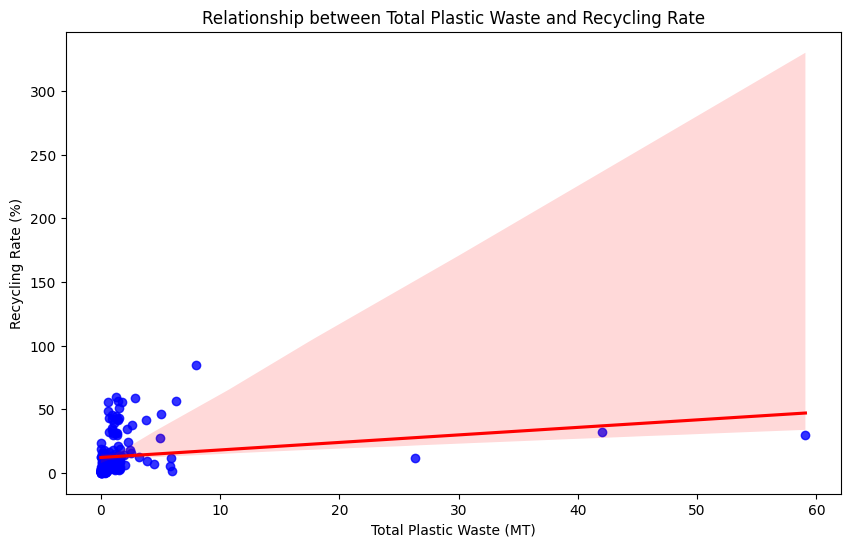

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Total_Plastic_Waste_MT', y='Recycling_Rate', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Total Plastic Waste and Recycling Rate')
plt.xlabel('Total Plastic Waste (MT)')
plt.ylabel('Recycling Rate (%)')
plt.show()

# Relationship between Per Capita Plastic and Recycling Rate

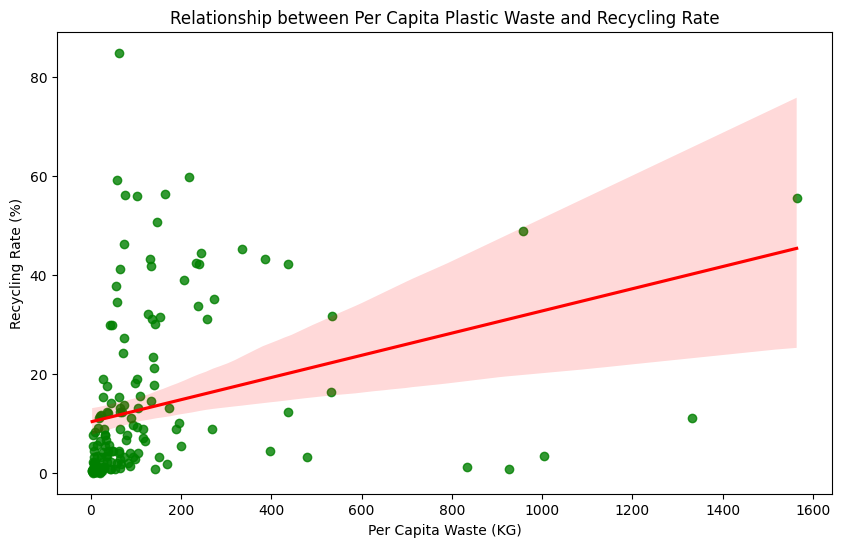

In [11]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Per_Capita_Waste_KG', y='Recycling_Rate', scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.title('Relationship between Per Capita Plastic Waste and Recycling Rate')
plt.xlabel('Per Capita Waste (KG)')
plt.ylabel('Recycling Rate (%)')
plt.show()

# Main Source of Plastic Waste

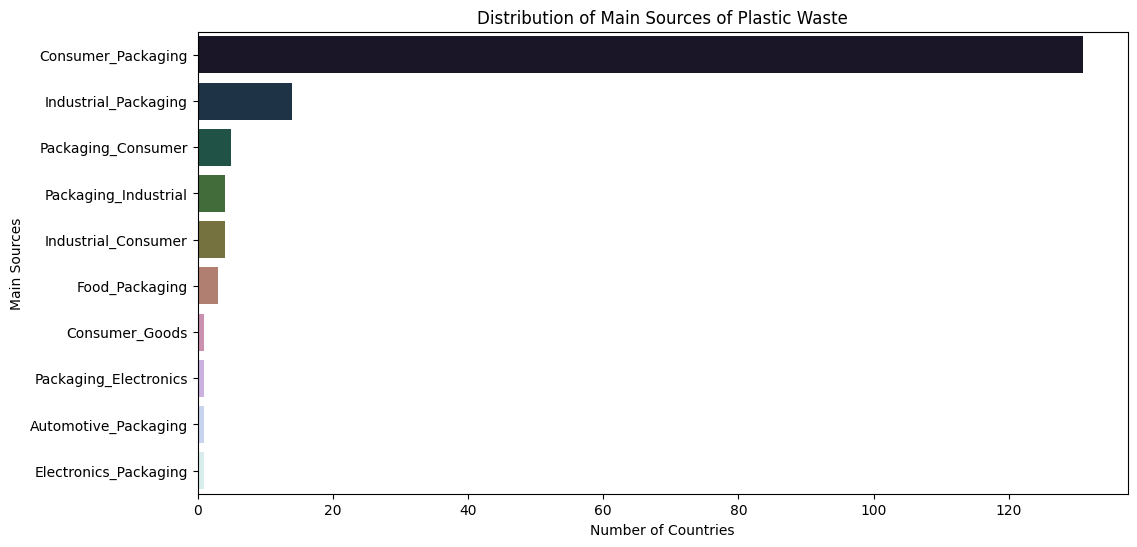

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Main_Sources', order=df['Main_Sources'].value_counts().index, palette='cubehelix')

plt.title('Distribution of Main Sources of Plastic Waste')
plt.xlabel('Number of Countries')
plt.ylabel('Main Sources')
plt.show()

# Recycling Rate by Main source of Pastic Waste

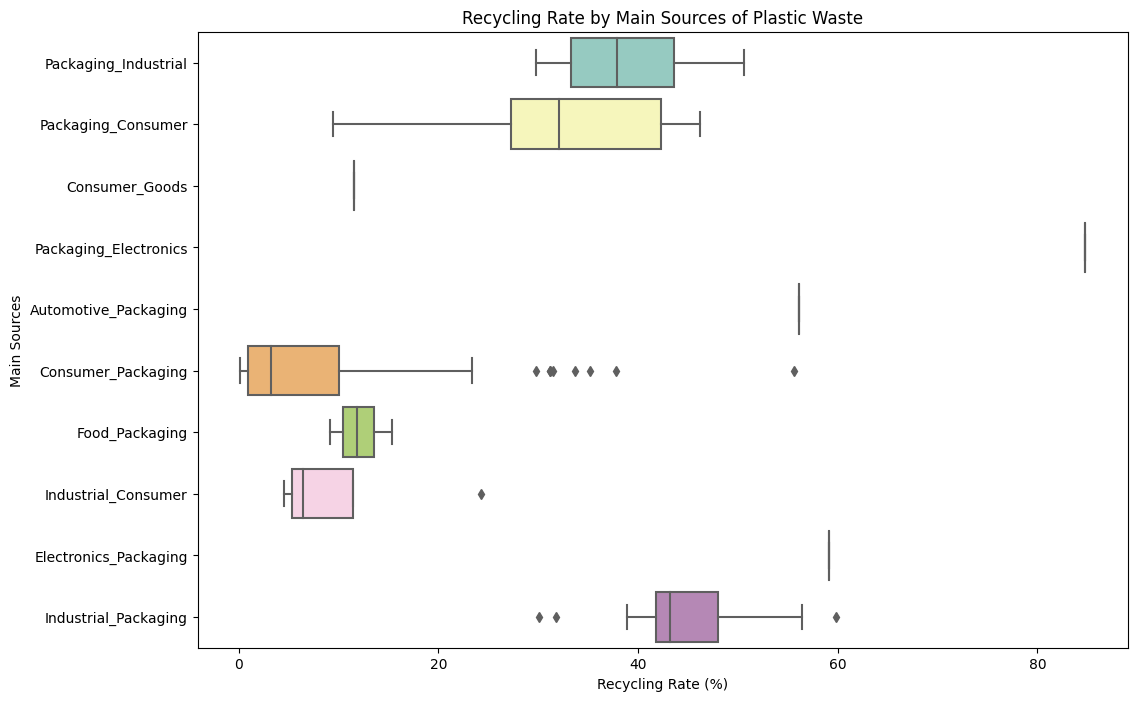

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Recycling_Rate', y='Main_Sources', palette='Set3')

plt.title('Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Recycling Rate (%)')
plt.ylabel('Main Sources')
plt.show()

# Distribution of Total Plastic Waste by Coastal Waste Risk

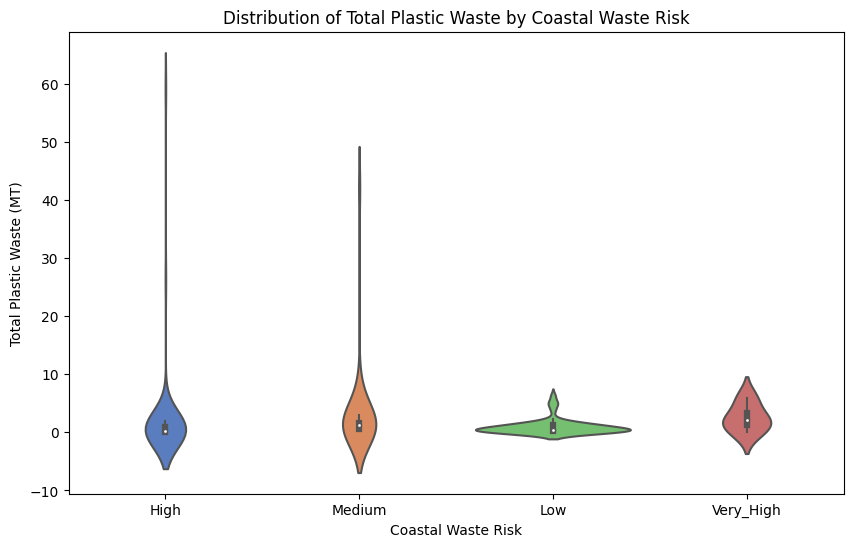

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Coastal_Waste_Risk', y='Total_Plastic_Waste_MT', palette='muted')

plt.title('Distribution of Total Plastic Waste by Coastal Waste Risk')
plt.xlabel('Coastal Waste Risk')
plt.ylabel('Total Plastic Waste (MT)')
plt.show()

# Avg Recycling Rate by Main Source of Plastic Waste

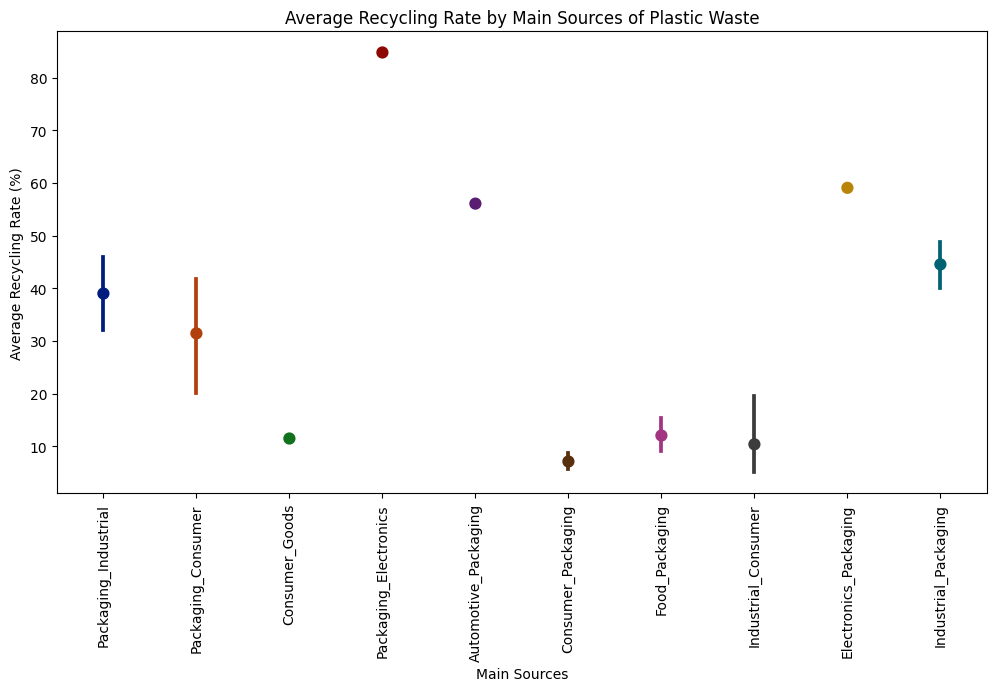

In [15]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, x='Main_Sources', y='Recycling_Rate', estimator='mean', palette='dark')

plt.title('Average Recycling Rate by Main Sources of Plastic Waste')
plt.xlabel('Main Sources')
plt.ylabel('Average Recycling Rate (%)')
plt.xticks(rotation=90)
plt.show()

<h2 style="text-align: center; color: #4A4A4A;">Thank You for Going Through This Notebook!</h2>
<p style="text-align: center; font-size: 1.2em; color: #4A4A4A;">If you found this analysis helpful, please make sure to upvote!</p>